The aim of this script is to breakdown the Clinical Significance categories for each category of DAVs

 1. DAVs found in splice sites
 2. DAVs creating new splice sites
 3. DAVs found in ISRE motifs
 4. DAVs creating new ISRE motifs
 5. DAVs flanking a certain distance from ISRE motifs
 6. DAVs that don't meet any of the above criteria
 
We will have a variable whichDataSet that will indicate which DataSet this analysis is being done for

In [20]:
whichDataSet = "HGMD"

In [21]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# This function is going to take in a mutation file assuming that the last column is the Clinical Significance
# It plots the bar graphs for number of muts in each Clinical Significance category
def plotNumberMutsForClinSig(mutdata):
    # Number of columns 
    cols_muts = mutdata.shape[1]
    # Frequency count for clinical significance
    mut_counts = mutdata.iloc[:,cols_muts-1].value_counts()
    # Create data frame of frequency count
    mut_counts_df = pd.DataFrame({"Numbers":mut_counts.values,"ClinSig":mut_counts.index.values},columns=["ClinSig","Numbers"])
    # Plot a bar graph which shows the break down of mutations 
    sns.set_style("whitegrid")
    ax = sns.barplot(x="ClinSig",y="Numbers",data=mut_counts_df)
    return ax
    

### This is the breakdown of clinical significances for all DAVs found in introns

In [23]:
# Read the DAV file for all 
intron_Intersect_muts = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts.txt",sep="\t",header=None)
if whichDataSet=="ClinVar":
    muts = intron_Intersect_muts.iloc[:,range(6,13)].drop_duplicates()
else:
    muts = intron_Intersect_muts.iloc[:,range(6,14)].drop_duplicates()
print muts.shape
muts.head()

(23400, 8)


,6,7,8,9,10,11,12,13
0,chr1,201293940,201293941,CS993722,+,G,A,DM
1,chr1,201293940,201293941,CS1413263,+,G,T,DM
2,chr1,201317569,201317570,CS041129,+,A,G,DM
3,chr1,201320264,201320265,CS139579,+,A,G,DM
4,chr1,201320264,201320265,CS002462,+,A,T,DM


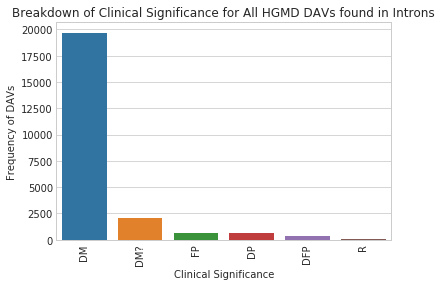

In [24]:
plotForCat = plotNumberMutsForClinSig(muts)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for All "+whichDataSet+" DAVs found in Introns")
plt.show()

### Category 1: DAVs found in splice sites

In [25]:
# Read the DAV file for ones found in splice sites
introns_Intersect_muts_in5SS = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_Within5SS.txt",sep="\t",header=None)
introns_Intersect_muts_in3SS = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_Within3SS.txt",sep="\t",header=None)
introns_Intersect_muts_inAllSS = introns_Intersect_muts_in5SS.append(introns_Intersect_muts_in3SS)
muts_inAllSS = introns_Intersect_muts_inAllSS.iloc[:,range(6,13)].drop_duplicates()
print muts_inAllSS.shape
muts_inAllSS.head()

(14071, 7)


,6,7,8,9,10,11,12
0,chr1,6441065,6441066,CS165098,G,A,DM
1,chr1,9972190,9972191,CS145935,A,G,DM?
2,chr1,9981170,9981171,CS127791,G,C,DM
3,chr1,10624437,10624438,CS111161,G,T,DM
4,chr1,11950520,11950521,CS115019,G,A,DM?


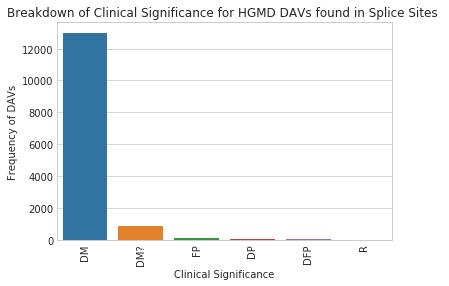

In [26]:
plotForCat = plotNumberMutsForClinSig(muts_inAllSS)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs found in Splice Sites ")
plt.show()

### Category 2: DAVs creating new splice sites

In [27]:
# Read the DAV file for ones found in splice sites
introns_Intersect_Muts_createSS = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_CreateSS.txt",sep="\t",header=None)
muts_createSS = introns_Intersect_Muts_createSS.iloc[:,range(6,13)].drop_duplicates()
print muts_createSS.shape
muts_createSS.head()

(618, 7)


,6,7,8,9,10,11,12
0,chr1,25306720,25306721,CM151432,C,T,FP
1,chr1,25321960,25321961,CM056685,A,T,FP
2,chr1,25317079,25317080,CS015893,G,A,FP
3,chr1,25317061,25317062,CM024420,T,C,FP
4,chr1,25316998,25316999,CS165427,G,A,DM


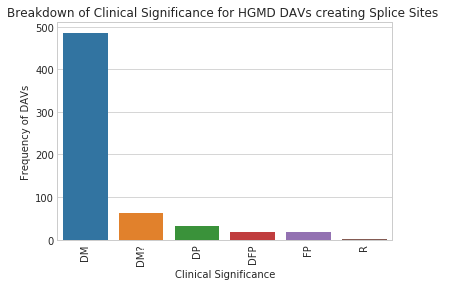

In [28]:
plotForCat = plotNumberMutsForClinSig(muts_createSS)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs creating Splice Sites ")
plt.show()

### Category 3: DAVs found in ISREs

In [29]:
introns_Intersect_Muts_inISREs = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_JustDestroyISRE.txt",sep="\t",header=None)
muts_inISREs = introns_Intersect_Muts_inISREs.iloc[:,range(6,13)].drop_duplicates()
print muts_inISREs.shape
muts_inISREs.head()

(867, 7)


,6,7,8,9,10,11,12
0,chr1,16024779,16024780,CM110909,A,G,DFP
1,chr1,21554083,21554084,CM113240,G,A,DM?
2,chr1,25306653,25306654,CM024419,G,A,FP
3,chr1,25306728,25306729,CM045805,T,C,FP
4,chr1,25306596,25306597,CM973731,G,T,FP


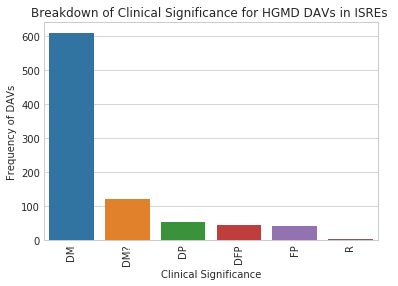

In [30]:
plotForCat = plotNumberMutsForClinSig(muts_inISREs)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs in ISREs ")
plt.show()

### Category 4: DAVs creating new ISREs

In [31]:
introns_Intersect_Muts_createISREs = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_JustCreateISRE.txt",sep="\t",header=None)
muts_createISREs = introns_Intersect_Muts_createISREs.iloc[:,range(6,13)].drop_duplicates()
print muts_createISREs.shape
muts_createISREs.head()

(911, 7)


,6,7,8,9,10,11,12
0,chr1,7961858,7961859,CR095375,C,G,DM
1,chr1,10304506,10304507,CM1312596,C,T,DM?
2,chr1,21561102,21561103,CM012045,G,T,DM
3,chr1,21561141,21561142,CM012048,A,G,DM
4,chr1,21561098,21561099,CM031609,A,G,DM


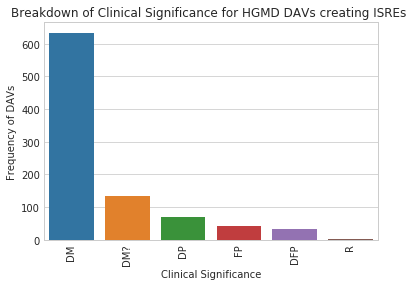

In [32]:
plotForCat = plotNumberMutsForClinSig(muts_createISREs)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs creating ISREs ")
plt.show()

### Not a real category but these are DAVs both destroying and creating ISREs

In [33]:
introns_Intersect_Muts_createdestroyISREs = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_BothCreateDestroyISRE.txt",sep="\t",header=None)
muts_createdestroyISREs = introns_Intersect_Muts_createdestroyISREs.iloc[:,range(6,13)].drop_duplicates()
print muts_createdestroyISREs.shape
muts_createdestroyISREs.head()

(388, 7)


,6,7,8,9,10,11,12
0,chr1,3774963,3774964,CR133723,A,G,FP
1,chr1,25306648,25306649,CM151429,C,G,FP
2,chr1,25306729,25306730,CS165426,G,T,DM
3,chr1,25321891,25321892,CM151434,T,A,FP
4,chr1,25321888,25321889,CM994726,G,C,FP


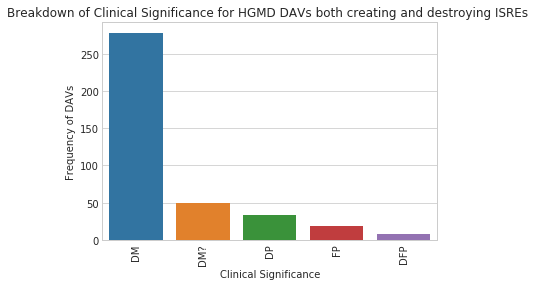

In [34]:
plotForCat = plotNumberMutsForClinSig(muts_createdestroyISREs)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs both creating and destroying ISREs ")
plt.show()

### Category 5: DAVs flanking 50bp of ISREs

In [35]:
ISREs_intersect_Muts_flanking50bp_ISREs = pd.read_table("../temp/"+whichDataSet+"/"+whichDataSet+"Muts_Flanking_100bpISREs.txt",sep="\t",header=None)
Muts_flanking50bp_ISREs = ISREs_intersect_Muts_flanking50bp_ISREs.iloc[:,range(5,13)].drop_duplicates()
print Muts_flanking50bp_ISREs.shape
Muts_flanking50bp_ISREs.head()

(4482, 8)


,5,6,7,8,9,10,11,12
0,chr1,5907193,5907194,CM077307,-,G,A,DM
1,chr1,5909192,5909193,CM051572,-,G,A,DM
6,chr1,5952824,5952825,CM139055,-,G,A,DM
9,chr1,5978277,5978278,CM051569,-,A,G,DM
12,chr1,5978373,5978374,CM080458,-,G,A,DM


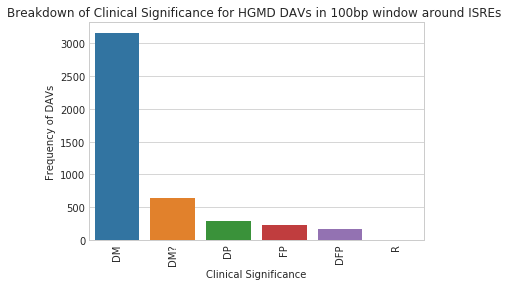

In [36]:
plotForCat = plotNumberMutsForClinSig(Muts_flanking50bp_ISREs)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs in 100bp window around ISREs ")
plt.show()

### Category 6: DAVs don't meet any category

In [37]:
introns_Intersect_Muts_NoCategory = pd.read_table("../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_DoNotMeetAnyCriteria.txt",sep="\t",header=None)
Muts_NoCategory = introns_Intersect_Muts_NoCategory.iloc[:,range(6,13)].drop_duplicates()
print Muts_NoCategory.shape
Muts_NoCategory.head()

(476, 7)


,6,7,8,9,10,11,12
0,chr1,6575245,6575246,CM096405,G,A,DFP
1,chr1,21561101,21561102,CM031610,G,C,DM
2,chr1,21561100,21561101,CM051003,G,C,DM
3,chr1,77044236,77044237,CM141123,G,A,DM
4,chr1,147579257,147579258,CR115837,G,A,DP


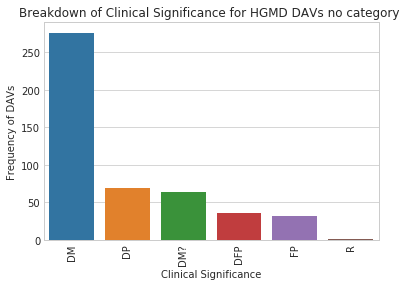

In [38]:
plotForCat = plotNumberMutsForClinSig(Muts_NoCategory)
plt.xlabel("Clinical Significance")
plt.ylabel("Frequency of DAVs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of Clinical Significance for "+whichDataSet+" DAVs no category ")
plt.show()